In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Normalize the images
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# Reshape the images to include the channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#Build a Convolutional Neural Network (CNN):  Use Keras to define the CNN architecture.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Model Architecture

The model is built using the Sequential API from Keras. It consists of several layers, each performing a specific function in the network.


### Layer-by-Layer Explanation

1. **Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))**
   - **Conv2D**: This is a 2D convolutional layer.
   - **32**: The number of filters (or kernels) in the convolutional layer. Each filter will learn to identify different features in the input image.
   - **kernel_size=(3, 3)**: The size of the convolutional filter (3x3 pixels). This means that the filter will slide over the input image, capturing local patterns of size 3x3.
   - **activation='relu'**: The activation function applied to the output of this layer. ReLU (Rectified Linear Unit) introduces non-linearity to the model, allowing it to learn more complex patterns.
   - **input_shape=(28, 28, 1)**: The shape of the input data. In this case, the input images are 28x28 pixels with 1 channel (grayscale).

2. **MaxPooling2D(pool_size=(2, 2))**
   - **MaxPooling2D**: This is a max-pooling layer.
   - **pool_size=(2, 2)**: The size of the pooling window (2x2 pixels). Max-pooling reduces the spatial dimensions (width and height) of the input by taking the maximum value in each 2x2 window, effectively downsampling the input.

3. **Conv2D(64, kernel_size=(3, 3), activation='relu')**
   - **Conv2D**: Another 2D convolutional layer, similar to the first one.
   - **64**: The number of filters in this convolutional layer.
   - **kernel_size=(3, 3)**: The size of the convolutional filter.
   - **activation='relu'**: The activation function applied to this layer.

4. **MaxPooling2D(pool_size=(2, 2))**
   - Another max-pooling layer, similar to the previous one.

5. **Flatten()**
   - **Flatten**: This layer flattens the 2D matrix output from the previous layer into a 1D vector. This is necessary before feeding the data into the fully connected (dense) layers.

6. **Dense(128, activation='relu')**
   - **Dense**: This is a fully connected (dense) layer.
   - **128**: The number of neurons in this dense layer.
   - **activation='relu'**: The activation function applied to this layer.

7. **Dropout(0.5)**
   - **Dropout**: This layer is used to prevent overfitting by randomly setting 50% (0.5) of the input units to 0 at each update during training.

8. **Dense(10, activation='softmax')**
   - **Dense**: Another fully connected (dense) layer.
   - **10**: The number of neurons in this layer, corresponding to the 10 classes in the MNIST dataset (digits 0-9).
   - **activation='softmax'**: The activation function applied to this layer. Softmax converts the logits into probabilities, summing to 1, which is useful for multi-class classification.

### Model Compilation

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

1. **optimizer='adam'**
   - **Adam**: The optimizer used to update the network's weights during training. Adam (Adaptive Moment Estimation) is an efficient and popular optimization algorithm.

2. **loss='categorical_crossentropy'**
   - **Categorical Crossentropy**: The loss function used for multi-class classification problems. It measures the difference between the true labels and the predicted labels.

3. **metrics=['accuracy']**
   - **Accuracy**: The metric used to evaluate the model's performance. Accuracy measures the proportion of correctly classified instances.

### Summary

- **Conv2D** layers extract features from the input images using convolutional filters.
- **MaxPooling2D** layers reduce the spatial dimensions, retaining the most important features.
- **Flatten** layer converts the 2D matrix to a 1D vector for the dense layers.
- **Dense** layers perform classification based on the extracted features.
- **Dropout** layer helps prevent overfitting.
- **Softmax** activation function in the final dense layer converts logits to probabilities for multi-class classification.

This CNN model is designed to classify handwritten digits from the MNIST dataset, using a series of convolutional and pooling layers to extract features, followed by dense layers to perform the classification.

In [10]:
#Train the model using the training data.
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 50s 103ms/step - loss: 0.2946 - accuracy: 0.9099 - val_loss: 0.0573 - val_accuracy: 0.9824
Epoch 2/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0935 - accuracy: 0.9720 - val_loss: 0.0438 - val_accuracy: 0.9845
Epoch 3/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0705 - accuracy: 0.9791 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0577 - accuracy: 0.9828 - val_loss: 0.0271 - val_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0246 - val_accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0231 - val_accur

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0262 - accuracy: 0.9922
Test accuracy: 0.9922


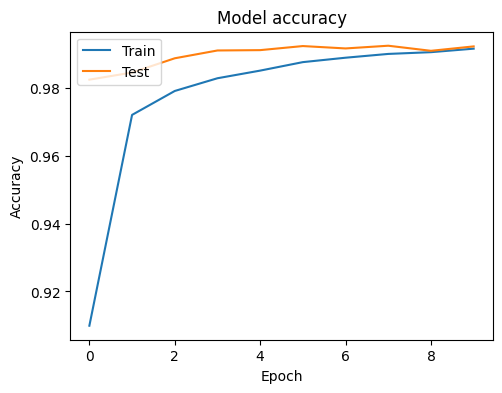

In [13]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

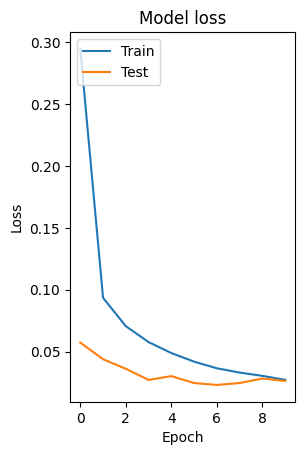

In [14]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
model.save('mnist_cnn_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Test with new image**

1/1 [==============================] - 0s 126ms/step


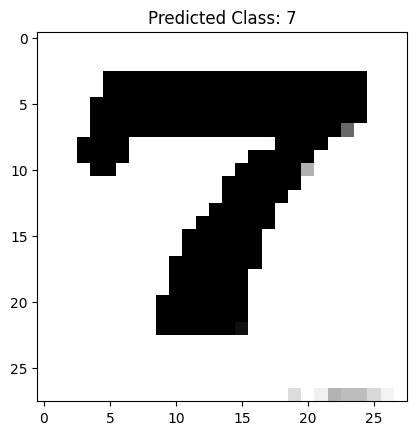

Predictions: [[1.0080172e-03 1.1420430e-04 4.4174085e-06 9.4516288e-09 7.2842668e-05
  3.0213675e-06 7.9737511e-08 9.9879396e-01 3.1626384e-06 1.8459853e-07]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your trained model (assuming you have saved it)
model = tf.keras.models.load_model('/content/mnist_cnn_model1.h5')

def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Reshape the image to include the channel dimension
    img_array = img_array.reshape((1, 28, 28, 1))
    # Normalize the image
    img_array = img_array.astype('float32') / 255
    return img_array

def predict_image(model, img_array):
    # Make a prediction
    predictions = model.predict(img_array)
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0], predictions

# Path to your image
img_path = '/content/test.png'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Predict the class of the image
predicted_class, predictions = predict_image(model, img_array)

# Display the image and the prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

# Print the predictions array
print(f'Predictions: {predictions}')

**Experiment with different architectures**

In [16]:

model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 1, 128)        

In [17]:
# Train and evaluate the modified model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

Epoch 1/10
469/469 [==============================] - 61s 125ms/step - loss: 0.3692 - accuracy: 0.8839 - val_loss: 0.0956 - val_accuracy: 0.9709
Epoch 2/10
469/469 [==============================] - 55s 117ms/step - loss: 0.1033 - accuracy: 0.9689 - val_loss: 0.0646 - val_accuracy: 0.9806
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0742 - accuracy: 0.9778 - val_loss: 0.0593 - val_accuracy: 0.9823
Epoch 4/10
469/469 [==============================] - 60s 128ms/step - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.0483 - val_accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.0529 - val_accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 58s 124ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 7/10
469/469 [==============================] - 55s 116ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0432 - val_ac

In [22]:
print(f'Test accuracy of modified model: {test_accuracy2:.4f}')

Test accuracy of modified model: 0.9886


In [23]:
model.save('mnist_cnn_model2.h5')

1/1 [==============================] - 0s 146ms/step


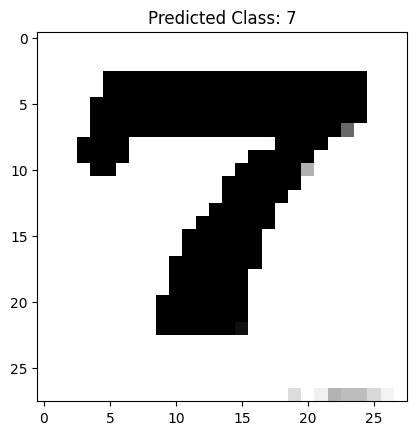

Predictions: [[1.0080172e-03 1.1420430e-04 4.4174085e-06 9.4516288e-09 7.2842668e-05
  3.0213675e-06 7.9737511e-08 9.9879396e-01 3.1626384e-06 1.8459853e-07]]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your trained model (assuming you have saved it)
model = tf.keras.models.load_model('/content/mnist_cnn_model2.h5')

def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Reshape the image to include the channel dimension
    img_array = img_array.reshape((1, 28, 28, 1))
    # Normalize the image
    img_array = img_array.astype('float32') / 255
    return img_array

def predict_image(model, img_array):
    # Make a prediction
    predictions = model.predict(img_array)
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0], predictions

# Path to your image
img_path = '/content/test.png'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Predict the class of the image
predicted_class, predictions = predict_image(model, img_array)

# Display the image and the prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

# Print the predictions array
print(f'Predictions: {predictions}')